# Homework w08d02

Repeat the analysis from the lab for different states. 
1. Choose poll and election results from three different states. 
2. For each state, obtain the posterior probability distribution for the probability of people voting for Bush based on the polls for a prior Beta distribution and the election results for a binomial likelihood function. 
3. Plot the cumulative distribution function of the posterior probability.

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import math
from scipy.special import gamma as Gamma
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.special import gamma as Gamma
from scipy.stats import beta

In [3]:
# Reading in the csv file
pre_poll = pd.read_csv('polls.csv')

# The first column "Unnamed" is clearly just a row-identifer machine generated. We can ignore that column or drop it all together
del pre_poll['Unnamed: 0']
del pre_poll['org']
pre_poll.head()

,year,survey,bush,state,edu,age,female,black,weight
0,1,9152,1.0,7,2,2,1,0,1403
1,1,9152,1.0,33,4,3,0,0,778
2,1,9152,0.0,20,2,1,1,0,1564
3,1,9152,1.0,31,3,2,1,0,1055
4,1,9152,1.0,18,3,1,1,0,1213


In [4]:
# Let's also produce a dictionary with the general poll percentages for state (no age)

container2 ={}
for state in pre_poll['state'].unique(): 
    c1 = pre_poll['state'] == state
    subset_interest = pre_poll[c1]  # Subsetting the data 
    contain = subset_interest['bush'].unique()  
    contain = contain[~np.isnan(contain)]   # Remove the NaNs - Think why can't we use dropna()?
        
    if len(contain) == 2:
        bush_quotient = float(subset_interest['bush'].value_counts()[1])/(float(subset_interest['bush'].value_counts()[1])+float(subset_interest['bush'].value_counts()[0]))
        temp_name = str(state)
        container2[temp_name] = bush_quotient

In [9]:
election88_dat = pd.read_csv('election88.csv')
del election88_dat["Unnamed: 0"]
election88_dat.head(10)

,stnum,st,electionresult,samplesize,raking,_merge
0,1,AL,0.59,203,0.673067,3
1,2,AK,0.60,0,NaN,1
2,3,AZ,0.60,194,0.568980,3
3,4,AR,0.56,121,0.563672,3
4,5,CA,0.51,1493,0.531725,3
5,6,CO,0.53,181,0.599325,3
6,7,CT,0.52,171,0.519580,3
7,8,DE,0.56,39,0.444178,3
8,9,DC,0.14,19,NaN,1
9,10,FL,0.61,750,0.623274,3


In [8]:
container2

{'1': 0.710691823899371,
 '10': 0.6380655226209049,
 '11': 0.5871212121212122,
 '13': 0.5,
 '14': 0.5323590814196242,
 '15': 0.6743295019157088,
 '16': 0.3893805309734513,
 '17': 0.6929133858267716,
 '18': 0.5956284153005464,
 '19': 0.6449704142011834,
 '20': 0.5102040816326531,
 '21': 0.4959349593495935,
 '22': 0.4646153846153846,
 '23': 0.5548098434004475,
 '24': 0.5166666666666667,
 '25': 0.6984126984126984,
 '26': 0.467680608365019,
 '27': 0.4,
 '28': 0.5882352941176471,
 '29': 0.625,
 '3': 0.5892857142857143,
 '30': 0.6666666666666666,
 '31': 0.5564738292011019,
 '32': 0.5416666666666666,
 '33': 0.43114543114543114,
 '34': 0.6061643835616438,
 '35': 0.5555555555555556,
 '36': 0.6257197696737045,
 '37': 0.5304347826086957,
 '38': 0.5161290322580645,
 '39': 0.528046421663443,
 '4': 0.5841584158415841,
 '40': 0.3333333333333333,
 '41': 0.6721311475409836,
 '42': 0.5714285714285714,
 '43': 0.6758620689655173,
 '44': 0.5659025787965616,
 '45': 0.782608695652174,
 '46': 0.58333333333333

### Arizona
Prior probability = 0.59

Likelihood = 0.60

Sample size = 194

In the election results 194 persons participated, i.e.  n=194 . Our likelihood function given by a binomial distribution is based on the election results, where 60% voted for Bush, i.e.  k=116 persons, and 40% against Bush, i.e.  n−k=78 persons. The prior is given by a Beta distribution based on the previous poll with 59 % pro Bush. That corresponds to  α=194  persons pro and  β=78  against Bush.

Posterior probability distribution
$$\pi(\theta| k=116)= \frac{\theta^{116+116-1}(1-\theta)^{78+78-1}}{B(116+116,78+78)}
= \frac{1}{B(232,156)} \theta^{231}(1-\theta)^{155}
= f_{Beta}(\theta;232,156)\ .$$

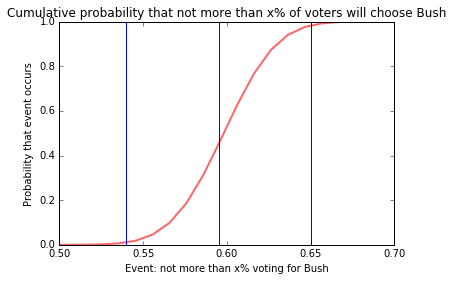

In [18]:
fig, ax = plt.subplots(1, 1)
a = 232
b = 156
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(0, 1, 100)
ax.plot(x, beta.cdf(x, a, b),'r-', lw=2,alpha=0.6, label='beta pdf')
plt.axvline(.595)
plt.axvline(.54)
plt.axvline(.65)
plt.xlim(.5,.7)
plt.xlabel("Event: not more than x% voting for Bush")
plt.ylabel("Probability that event occurs")
plt.title("Cumulative probability that not more than x% of voters will choose Bush")
plt.show()

### California
Prior probability = 0,57

Likelihood = 0.51

Sample size = 1493

In the election results 1493 persons participated, i.e.  n=1493 . Our likelihood function given by a binomial distribution is based on the election results, where 51% voted for Bush, i.e. k=761 persons, and 49% against Bush, i.e.  n−k=732 persons. The prior is given by a Beta distribution based on the previous poll with 57 % pro Bush. That corresponds to  α=851  persons pro and  β=642  against Bush.

Posterior probability distribution
$$\pi(\theta| k=761)= \frac{\theta^{761+851-1}(1-\theta)^{732+642-1}}{B(761+851,732+642)}
= \frac{1}{B(1612,1374)} \theta^{1611}(1-\theta)^{1373}
= f_{Beta}(\theta;1612,1374)\ .$$

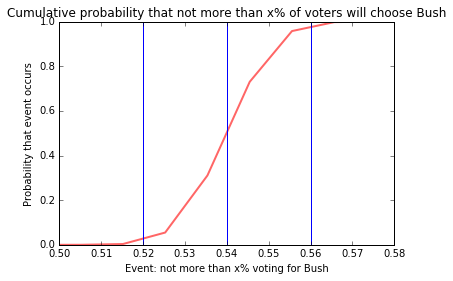

In [22]:
fig, ax = plt.subplots(1, 1)
a = 1612
b = 1374
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(0, 1, 100)
ax.plot(x, beta.cdf(x, a, b),'r-', lw=2,alpha=0.6, label='beta pdf')
plt.axvline(.54)
plt.axvline(.52)
plt.axvline(.56)
plt.xlim(.5,.58)
plt.xlabel("Event: not more than x% voting for Bush")
plt.ylabel("Probability that event occurs")
plt.title("Cumulative probability that not more than x% of voters will choose Bush")
plt.show()

### Delaware
Prior probability = 0,37

Likelihood = 0.56

Sample size = 39

In the election results 39 persons participated, i.e.  n=39. Our likelihood function given by a binomial distribution is based on the election results, where 56% voted for Bush, i.e. k=22 persons, and 44% against Bush, i.e.  n−k=17 persons. The prior is given by a Beta distribution based on the previous poll with 37% pro Bush. That corresponds to  α=14 persons pro and  β=25  against Bush.

Posterior probability distribution
$$\pi(\theta| k=22)= \frac{\theta^{22+14-1}(1-\theta)^{17+25-1}}{B(22+14,17+25)}
= \frac{1}{B(36,36)} \theta^{35}(1-\theta)^{35}
= f_{Beta}(\theta;36,36)\ .$$


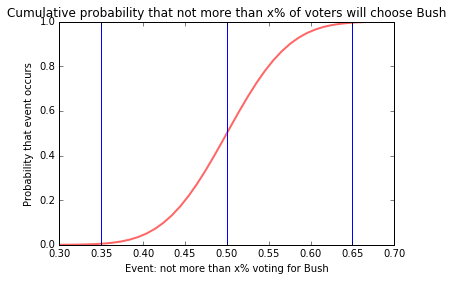

In [27]:
fig, ax = plt.subplots(1, 1)
a = 36
b = 36
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(0, 1, 100)
ax.plot(x, beta.cdf(x, a, b),'r-', lw=2,alpha=0.6, label='beta pdf')
plt.axvline(.5)
plt.axvline(.35)
plt.axvline(.65)
plt.xlim(.3,.7)
plt.xlabel("Event: not more than x% voting for Bush")
plt.ylabel("Probability that event occurs")
plt.title("Cumulative probability that not more than x% of voters will choose Bush")
plt.show()